In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import requests
from datetime import datetime

In [16]:
# Age Variables, head of household

year_of_birth = 1992
Age_diff_spouse = 4
retirement_year = 2028
# Investment Variables

# stock market parameters
stock_market_mean_yoy_growthrate_percent = 8
stock_market_std_yoy_growthrate = 0.180977

Investments = {
    'Ret_accnts' :  {
        'type': 'stock',
        'current_value': 400000,
        'beta': 1,
        'mean_yoy_growthrate_percent': 8, 
        'std_yoy_growthrate': 0.180977,
        'additions_yearly' : 0,
        'currency' : 'USD'
    },
    'TSLA' :  {
        'type': 'stock',
        'current_value': 1400000,
        'beta': 1,
        'mean_yoy_growthrate_percent': 8, 
        'std_yoy_growthrate': 0.180977,
        'additions_yearly' : 0,
        'currency' : 'USD'
    },
    'Marcus' :  {
        'type': 'cash_certificate',
        'current_value': 20000,
        'additions_yearly' : 0,
        'mean_yoy_growthrate_percent': 5,
        'currency' : 'USD'
    },
    'ret_home' : {
        'type': 'real_estate',
        'current_value': 20000000,
        'mean_yoy_growthrate_percent': 7,
        'down_percent': 25,
        'mortgage_term': 30,
        'mortgage_start_year': retirement_year,
        'mortgage_percent': 9.85,
        'closing_costs_onetime': 3500000,
        'currency': 'INR', # Currency of loan
        'rental_income': 0,
        'rental_income_yoy_inc_percent': 3,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 2000,
        'home_insurance': 1390,
        'yearly_misc_repair_or_other': 12000
        
    },
    'us_rent' : {
        'type': 'real_estate',
        'current_value': 300000,
        'mean_yoy_growthrate_percent': 7.83,
        'down_percent': 20,
        'mortgage_term': 30,
        'mortgage_start_year': 2024,
        'mortgage_percent': 6.25,
        'closing_costs_onetime': 30000,
        'currency': 'USD',
        'rental_income': 1500,
        'rental_income_yoy_inc_percent': 3,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 200,
        'home_insurance': 50,
        'yearly_misc_repair_or_other': 1200
    },
    'Ind_land' : {
        'type': 'real_estate',
        'current_value': 5000000,
        'mean_yoy_growthrate_percent': 5,
        'down_percent': 50,
        'mortgage_term': 15,
        'mortgage_start_year': 2024,
        'mortgage_percent': 6.25,
        'closing_costs_onetime': 500000,
        'currency': 'INR',
        'rental_income': 0,
        'rental_income_yoy_inc_percent': 0,
        'property_tax_percent': 1.36,
        'HOA_or_maintainance': 10000,
        'home_insurance': 0,
        'yearly_misc_repair_or_other': 0
    }
}

# India Living
Monthly_living = 200000
Monthly_living_currency = 'INR' # USD or INR
India_infaltion_mean = 7.379
India_inflation_std = 0.04878

# Unexpected expenses percent of living expense
Unexpected_expense_min_percent = 0.5
Unexpected_expense_max_percent = 15

# Post retirement support job
job_income = 2000000
job_yoy_increment_percent = 3
job_years_after_ret = 5
job_parameter_curency = 'INR' # USD or INR

# US tax brackets 
# Federal tax brackets (married filing jointly) for 2023
US_federal_brackets = [
    (0, 22000, 0.10),
    (22000, 89450, 0.12),
    (89450, 190750, 0.22),
    (190750, 364200, 0.24),
    (364200, 462500, 0.32),
    (462500, 693750, 0.35),
    (693750, 1_000_000, 0.37)
]


# California state tax brackets (married filing jointly) for 2023
US_state_brackets = [
    (0, 20198, 0.01),
    (20198, 47884, 0.02),
    (47884, 75576, 0.04),
    (75576, 104910, 0.06),
    (104910, 132590, 0.08),
    (132590, 677278, 0.093),
    (677278, 812728, 0.103),
    (812728, 1354550, 0.113),
    (1354550, 1_000_000, 0.123)
]


# India tax brackets
India_federal_brackets = [
    (0, 250000, 0.0),
    (250000, 500000, 0.05),
    (500000, 1000000, 0.20),
    (1000000, 10000000, 0.30)
]


# USD to INR rates 
# Fetching the current USD to INR conversion rate from an API

default_USD_to_INR = 83.5
USD_INR_comission_percent = 0.550
USD_INR_mean_growth_percent = 3.040
USD_INR_STD = 0.0557

try : 
    response = requests.get("https://api.exchangerate-api.com/v4/latest/USD")
    data = response.json()
    
    # Extracting the USD to INR conversion rate
    USD_INR_rate = data["rates"]["INR"]
except : 
    USD_INR_rate = default_USD_to_INR
    print('unable to reach server to get live USD to INR, using default USD to INR')

#Calculated_parameters 
current_year = datetime.now().year
target_survival_year = year_of_birth+Age_diff_spouse+100
years_to_calculate = target_survival_year - current_year

unable to reach server to get live USD to INR, using default USD to INR


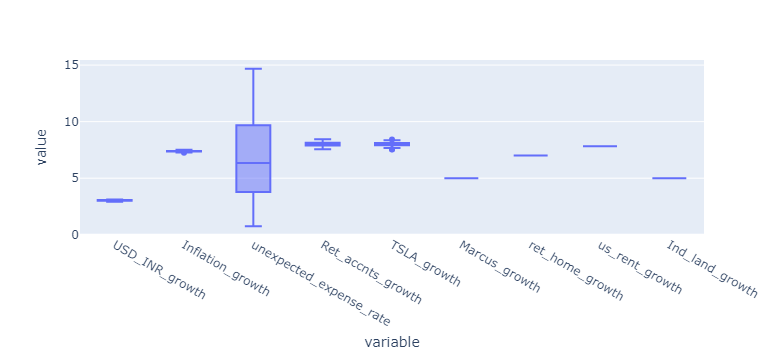

In [32]:
# Random Variable Generation 
# Per investment YOY growth percent, include land and stocks
# USD to INR YOY growth 
# India inflation

def gen_simulation_variables(Investments,years_to_calculate,USD_INR_mean_growth_percent,USD_INR_STD,India_infaltion_mean,India_inflation_std,Unexpected_expense_min_percent, Unexpected_expense_max_percent):
    rand_var_df = pd.DataFrame()
    rand_var_df['USD_INR_growth'] = np.random.normal(loc=USD_INR_mean_growth_percent,scale = USD_INR_STD,size = years_to_calculate)
    rand_var_df['Inflation_growth'] = np.random.normal(loc=India_infaltion_mean,scale = India_inflation_std,size = years_to_calculate)
    rand_var_df['unexpected_expense_rate'] = np.random.uniform(Unexpected_expense_min_percent, Unexpected_expense_max_percent,size= years_to_calculate)
    for key,invs in Investments.items(): 
        try: 
            means = invs['mean_yoy_growthrate_percent']
        except: 
            means = 5
            print(key,'analysis will be inaccurate for this investment without mean YOY growth')
        try : 
            std_dev = invs['std_yoy_growthrate']
        except :
            std_dev = 0
        # Investments input mean,stdev
        # print(key, 'mean=',means,'stdev=',std_dev)
        rand_var_df[f'{key}_growth'] = np.random.normal(loc=means,scale = std_dev,size = years_to_calculate)
    
    return rand_var_df

# Investments output mean, stdev
simulation_var_df = gen_simulation_variables(Investments,years_to_calculate,USD_INR_mean_growth_percent,USD_INR_STD,India_infaltion_mean,India_inflation_std,Unexpected_expense_min_percent, Unexpected_expense_max_percent)
# print(rand_var_df.mean(),rand_var_df.std())
fig = px.box(simulation_var_df)
fig.show()


In [33]:
simulation_var_df

,USD_INR_growth,Inflation_growth,unexpected_expense_rate,Ret_accnts_growth,TSLA_growth,Marcus_growth,ret_home_growth,us_rent_growth,Ind_land_growth
0,2.970120,7.314483,3.130458,8.115997,8.062619,5.0,7.0,7.83,5.0
1,3.034482,7.387988,1.660745,8.115635,7.790748,5.0,7.0,7.83,5.0
2,3.073162,7.300002,8.793222,7.921623,7.925759,5.0,7.0,7.83,5.0
3,3.071554,7.366249,12.698409,8.188565,7.992500,5.0,7.0,7.83,5.0
4,3.100568,7.452300,5.207472,8.147483,7.747368,5.0,7.0,7.83,5.0
...,...,...,...,...,...,...,...,...,...
67,2.983209,7.458017,9.084536,7.928776,7.923231,5.0,7.0,7.83,5.0
68,3.093776,7.381591,10.992915,8.026134,8.088983,5.0,7.0,7.83,5.0
69,3.079041,7.429736,13.953409,7.989202,7.989751,5.0,7.0,7.83,5.0
70,3.034846,7.405957,8.354143,8.071599,8.190999,5.0,7.0,7.83,5.0


In [41]:
#Simulating 
#Calculate spend needed per year
# inflation adjusted Living expenses with vacation + Unexpected Expenses (like health) + Real_Estate_EMIs 
# Then calculate pre tax amount needed
# Then subtract retirement job income
# Then calculate post tax amount needed

simulation_var_df['year'] =  current_year + simulation_var_df.index
simulation_var_df['age'] = current_year + simulation_var_df.index - year_of_birth
for sim_year in simulation_var_df.index: 
    # Calculation inflated living 
    try : 
        simulation_var_df.loc[sim_year,'inflated_living'] = Monthly_living * (1+ simulation_var_df.loc[sim_year-1,'Inflation_growth']/100)*12
    except: 
        simulation_var_df.loc[sim_year,'inflated_living'] = Monthly_living*12
    # making living expense zero until retirment year    
    if simulation_var_df.loc[sim_year,'year'] < retirement_year: 
        simulation_var_df.loc[sim_year,'living_expense'] =0
        simulation_var_df.loc[sim_year,'unexpected_expense'] = 0
    else :
        simulation_var_df.loc[sim_year,'living_expense'] = simulation_var_df.loc[sim_year,'inflated_living']
        simulation_var_df.loc[sim_year,'unexpected_expense'] =  simulation_var_df.loc[sim_year,'living_expense']* (simulation_var_df.loc[sim_year,'unexpected_expense_rate']/100)
    

simulation_var_df.drop('inflated_living', axis=1, inplace=True)
simulation_var_df

,USD_INR_growth,Inflation_growth,unexpected_expense_rate,Ret_accnts_growth,TSLA_growth,Marcus_growth,ret_home_growth,us_rent_growth,Ind_land_growth,year,age,living_expense,unexpected_expense
0,2.970120,7.314483,3.130458,8.115997,8.062619,5.0,7.0,7.83,5.0,2024,32,0.000000e+00,0.000000
1,3.034482,7.387988,1.660745,8.115635,7.790748,5.0,7.0,7.83,5.0,2025,33,0.000000e+00,0.000000
2,3.073162,7.300002,8.793222,7.921623,7.925759,5.0,7.0,7.83,5.0,2026,34,0.000000e+00,0.000000
3,3.071554,7.366249,12.698409,8.188565,7.992500,5.0,7.0,7.83,5.0,2027,35,0.000000e+00,0.000000
4,3.100568,7.452300,5.207472,8.147483,7.747368,5.0,7.0,7.83,5.0,2028,36,2.576790e+06,134185.620318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.983209,7.458017,9.084536,7.928776,7.923231,5.0,7.0,7.83,5.0,2091,99,2.579340e+06,234321.090616
68,3.093776,7.381591,10.992915,8.026134,8.088983,5.0,7.0,7.83,5.0,2092,100,2.578992e+06,283506.441728
69,3.079041,7.429736,13.953409,7.989202,7.989751,5.0,7.0,7.83,5.0,2093,101,2.577158e+06,359601.419193
70,3.034846,7.405957,8.354143,8.071599,8.190999,5.0,7.0,7.83,5.0,2094,102,2.578314e+06,215396.008518


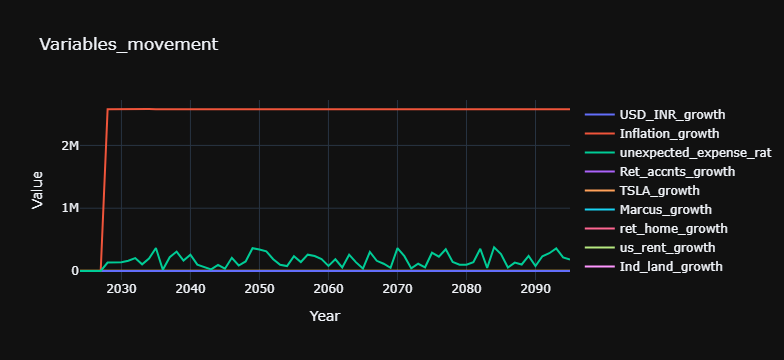

In [43]:
fig = go.Figure()
for column in simulation_var_df.columns:
    fig.add_trace(go.Scatter(x=simulation_var_df['year'], y=simulation_var_df[column], mode='lines', name=column))

fig.update_layout(
    title='Variables_movement',
    xaxis_title='Year',
    yaxis_title='Value',
    template='plotly_dark'
)

# Show the plot
fig.show()

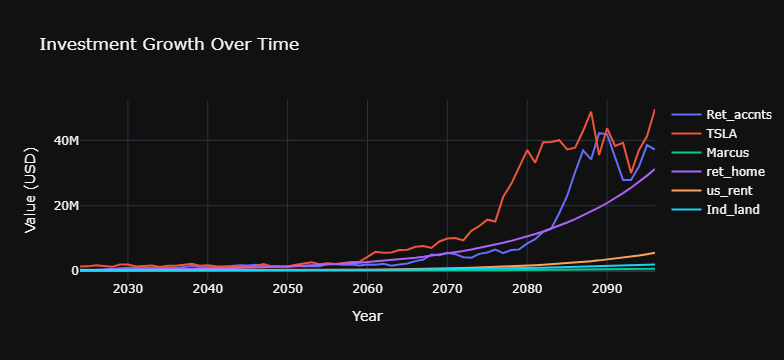

In [6]:
# Function to convert INR investments to USD
def convert_inr_to_usd(inr_value, usd_inr_rate, usd_inr_mean_growth, usd_inr_std, years):
    usd_values = [inr_value / usd_inr_rate]
    for year in range(1, years + 1):
        usd_inr_rate *= np.random.normal(1 + usd_inr_mean_growth, usd_inr_std)
        usd_value = inr_value / usd_inr_rate
        usd_values.append(usd_value)
    return usd_values

 
# Function to calculate mortgage payment (EMI)
def calculate_mortgage_payment(principal, annual_rate, term_years):
    monthly_rate = annual_rate / 12 / 100
    payments = term_years * 12
    return principal * monthly_rate / (1 - (1 + monthly_rate) ** -payments)

# Function to calculate investment growth with beta adjustment and yearly additions
def calculate_investment_growth_with_beta(current_value, mean_yoy_growthrate, std_yoy_growthrate, beta, additions_yearly, years):
    values = [current_value]
    for year in range(1, years + 1):
        market_growth_rate = np.random.normal(stock_market_mean_yoy_growthrate_percent / 100, stock_market_std_yoy_growthrate)
        adjusted_growth_rate = mean_yoy_growthrate / 100 + beta * (market_growth_rate - stock_market_mean_yoy_growthrate_percent / 100)
        new_value = values[-1] * (1 + adjusted_growth_rate) + additions_yearly
        values.append(new_value)
    return values

# Function to calculate investment growth for non-stock investments with yearly additions
def calculate_investment_growth(current_value, mean_yoy_growthrate, std_yoy_growthrate, additions_yearly, years):
    values = [current_value]
    for year in range(1, years + 1):
        growth_rate = np.random.normal(mean_yoy_growthrate / 100, std_yoy_growthrate)
        new_value = values[-1] * (1 + growth_rate) + additions_yearly
        values.append(new_value)
    return values

# Function to calculate real estate investment with mortgage, rental income, taxes, etc.
def calculate_real_estate_investment(investment, years):
    values = [investment['current_value']]
    mortgage_principal = investment['current_value'] * (1 - investment['down_percent'] / 100)
    mortgage_payment = calculate_mortgage_payment(mortgage_principal, investment['mortgage_percent'], investment['mortgage_term'])
    for year in range(1, years + 1):
        if current_year + year < investment['mortgage_start_year'] + investment['mortgage_term']:
            mortgage_payment_yearly = mortgage_payment * 12
        else:
            mortgage_payment_yearly = 0
        rental_income = investment['rental_income'] * (1 + investment['rental_income_yoy_inc_percent'] / 100) ** year
        property_tax = investment['current_value'] * investment['property_tax_percent'] / 100
        yearly_costs = mortgage_payment_yearly + property_tax + investment['HOA_or_maintainance'] * 12 + investment['home_insurance'] * 12 + investment['yearly_misc_repair_or_other']
        new_value = values[-1] * (1 + investment['mean_yoy_growthrate_percent'] / 100) + rental_income - yearly_costs
        values.append(new_value)
    return values

# Simulating the investment growth for each investment
investment_values = {}
for key, investment in Investments.items():
    if investment['currency'] == 'INR':
        converted_values = convert_inr_to_usd(investment['current_value'], USD_INR_rate, USD_INR_mean_growth_percent, USD_INR_STD, years_to_calculate)
        investment['current_value'] = converted_values[0]  # Use the converted initial value
        values = calculate_investment_growth(investment['current_value'], investment['mean_yoy_growthrate_percent'], 0, investment.get('additions_yearly', 0), years_to_calculate)
        investment_values[key] = values
    elif investment['type'] == 'stock':
        values = calculate_investment_growth_with_beta(investment['current_value'],investment['mean_yoy_growthrate_percent'],investment['std_yoy_growthrate'], investment['beta'], investment['additions_yearly'], years_to_calculate)
        investment_values[key] = values
    elif investment['type'] == 'cash_certificate':
        values = calculate_investment_growth(investment['current_value'], investment['mean_yoy_growthrate_percent'], 0, investment['additions_yearly'], years_to_calculate)
        investment_values[key] = values
    elif investment['type'] == 'real_estate':
        values = calculate_real_estate_investment(investment, years_to_calculate)
        investment_values[key] = values

# Converting the investment values to a DataFrame for easier manipulation and visualization
df_investments = pd.DataFrame(investment_values)
df_investments.index = range(current_year, current_year + years_to_calculate + 1)

# Plotting the investment values using Plotly
fig = go.Figure()
for column in df_investments.columns:
    fig.add_trace(go.Scatter(x=df_investments.index, y=df_investments[column], mode='lines', name=column))

fig.update_layout(
    title='Investment Growth Over Time',
    xaxis_title='Year',
    yaxis_title='Value (USD)',
    template='plotly_dark'
)

# Show the plot
fig.show()
